# Week 7 - Task 3

## Tim Gormly
### 2/27/2023

<hr>




## Plotting Fahrenheit to Celsius Conversions

In this section, pandas and matplotlib will be used to convert fahrenheit temperature values into celsius values.  Matplotlib will be used to show a visualization of the converstion.  First, we will start by importing matplotlib, creating a labmda function that performs the temperature conversion - {Celsius = 5/9 * (Fahrenheit - 32)}.  Using a list comprehension and this lambda expression, we'll create a list of tuples containing (fahrenheit temperature, celsius temperature).

In [74]:
import matplotlib

c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

Next, we will load this list into a DataFrame using custom column names.  Then, we will use the DataFrame's plot method to prepare a visualistion with Fahrenheit assigned to the x axis and Celsius assigned to the y axis.  By default, the y axis will not be labeled, so this has to be coded explicitly to have a Celsius label.  The Fahrenheit label is inferred.  Without specifying a label, Celsius is inferred and placed in the legend.

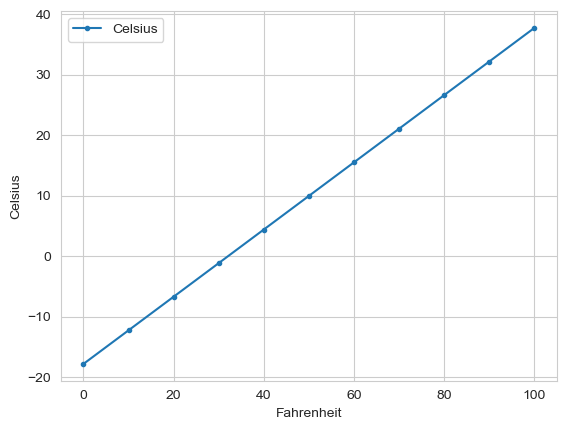

In [75]:
import pandas as pd

df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

axes.grid('both')

As we might expect, we can see that the line passes 0 on the y axis when it the x axis is at 32.  This represents the temperature at which water freezes in both units.

<hr>

## January High Temperatures

In this section, we will analyze a csv file containing the average high temperature in January between 1895 and 2018. We will use Pandas as well as a few other libraries to complete this.

<hr>

### <em>Reviewing the Data in Pandas</em>

To start with, we need to use read_csv() to load the csv file into a Pandas DataFrame, and then use the head() and tail() methods to view the data.

In [76]:
nyc = pd.read_csv(r"ave_hi_nyc_jan_1895-2018.csv")

nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [77]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


We can see that there are 124 total years sampled in this dataset.  The "Values" column would be more descriptive if it were named "Temperature".

In [78]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


The values in the Date column are listed as YYYYMM format.  We'll use a floordiv(100) method to effectively chop off the two MM digits, leaving us with only YYYY.  We are analyzing average temperatures in January only, so we do not need extra data that shows the month.

In [79]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


That is much more clear.  

Now let's use the describe() method to view some statistics.

In [80]:
pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

As expected, there are 124 values.

At minimum, the average high temperature in January was 26.10 degrees Fahrenheit.  At maximum, the average high temperature was 47.60 degrees Fahrenheit.  The mean value is 37.60, right in the middle of the minimum and maximum.  The 25% and 75% mark are roughly the same distance from the 50% mark, which is equivalent to the mean.  

<hr>

### <em>Performing Linear Regression With SciPy

Now we will use the stats module from SciPy to perform linear regression on this data set.  This will help us to project the average high temperature in January in a future year.

In [81]:
from scipy import stats

# stats.linregress receives the columns from our dataframe that serve as the x and y axis
# best fit line information is then stored in the linear_regression variable (slope, intercept, etc)

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

After loading our linear_regression variable with the return of stats.linregress, we can view the slope and intercept of the best fit line for this data set. 

In [82]:
print(f"{linear_regression.slope = }\n")
print(f"{linear_regression.intercept = }")

linear_regression.slope = 0.014771361132966163

linear_regression.intercept = 8.694993233674289


Now that we have the slope and intercept for our line, we can predict the average high temperature in January for a future year using y = mx + b.

In [83]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

According to our model, the average high temperature for the month of January 2026 will be 38.6 degrees Fahrenheit.

<hr>

### <em>Visualizing Data With Seaborn

Using the Seaborn library, we can visualize this data on a scatterplot.

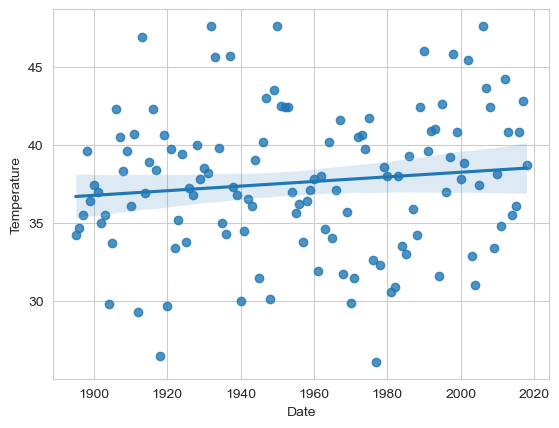

In [84]:
import seaborn as sns

sns.set_style('whitegrid')


axes = sns.regplot(x=nyc.Date, y=nyc.Temperature )

<hr>

### <em>Performing Linear Regression With SciPy

Now we will reimplement this simple linear regression using a scikit-learn estimator.  We will start by reloading a fresh DataFrame.

In [85]:
# reload a dataframe from the CSV
nyc = pd.read_csv(r"ave_hi_nyc_jan_1895-2018.csv")

nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.Date = nyc.Date.floordiv(100) # use floor dive to remove the "01" representing January in the YYYYMM date format

Our data has been loaded - let's take a look.

In [86]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state = 11)

Our model is ready for LinearRegression, but we need to import the sklearn's LinearRegression.

In [88]:
from sklearn.linear_model import LinearRegression

Then, we will create a LinearRegression object.  And then load our training data with the .fit method to complete LinearRegression.

In [89]:
linear_regression = LinearRegression()

In [90]:
linear_regression.fit(X=x_train, y=y_train)

LinearRegression()

With that completed, we can again see the slope and intercept.  These are now attributes of the linear_regression object known as coef_ and intercept_

In [93]:
linear_regression.coef_

-0.30779820252656265

In [94]:
linear_regression.intercept_

-0.30779820252656265

<hr>

### <em>Testing the Model</em>

Now that this linear regression has been performed, we can test our results.  We will check what our model predicts, and the result we expect.

In [95]:
predicted = linear_regression.predict(x_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


Our results are somewhat close, but the predicted value is typically higher than the expected value.

<hr>

### <em>Predicting Future Temperatures and Estimating Past Temperatures

As we did with the slope and intercept values we received from SciPy, we can use y = mx + b once more to estimate past average temperatures and predict future average temperatures.

We will create a quick lambda expression in a variable to make these predictions.  We will then review an estimate for 1890, and predict the future temperature for 2026.

In [96]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(1890)

array([36.34246432])

In [97]:
predict(2026)

array([38.97973189])

For 2026, the sklearn values we just used predicted an average high temperature of 38.97973189 in January 2026.  Our previous work in SciPy's stats module predicted 38.62177088906374.  These two results are within 0.358 degrees of each other.  

<hr>

### <em>Visualizing the Dataset

Now we can use Seaborn once again to few this data on a scatterplot.

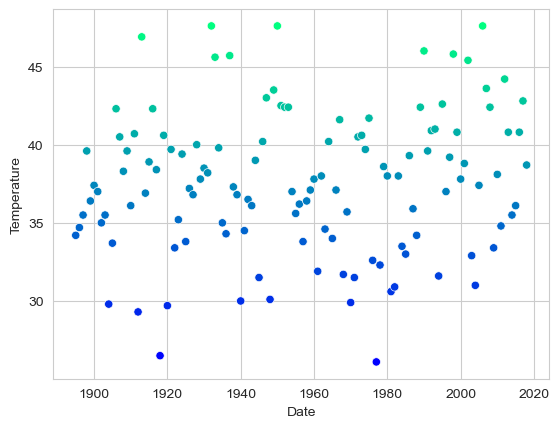

In [98]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

To make things a bit cleaner, we'll adjust the bounds on the y-axis to a minimum of 10 and a maximum of 70.

In [99]:
axes.set_ylim(10, 70)

(10.0, 70.0)

Now we can use numpy to help display the regression line for this dataset.  First, we'll import the library and then create an array with the start and end date from the dataset.

In [100]:
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

Now we can use the lambda function we created previously to create our y-coordinates for our best fit line.

In [101]:
y = predict(x)

Finally, we can use Matplotlib to plot a line based on these x and y pairs.

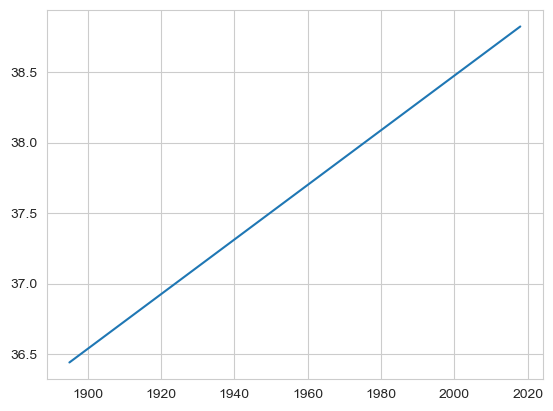

In [102]:
import matplotlib.pyplot as plt

line = plt.plot(x, y)

<hr>

### <em>Review</em>

These two methods yielded a very similar result.  For me, for something simple like the example we just reviewed, I think SciPy is sufficient.  There is much less overall code, with simpler syntax, to achieve a very similar result to what we found with sklearn.  That said, sklearn seems to be much more robust.  I imagine that the training and testing features of this module can be very beneficial with complex tasks, or in more high pressure scenarios where testing data is vitally important.  

While sklearn feels more alien to me than SciPy, the previous example did not have <em>so many</em> lines of code.  I think that learning both of these tools would be beneficial.  It is simple enough to test your data with both methods.  Doing so can help you catch any human error in your code.  You would know to expect very similar results between the two methods, so this could be a good self-check.

